In [1]:
# Jupyter notebook for some of the computations for my final project

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [2]:
# Grabbing datasets

signal_df = pd.read_csv("data\\cellular_network_analysis_dataset\\signal_metrics.csv") # I have already tested this data set and found it to be very random
network_df = pd.read_csv("data\\network_anomaly_dataset\\network_dataset_labeled.csv") # Currently examining

"\nThis doesn't look as random as some of the previous data that I looked at, which is a good sign. It has some noticable rises and falls, and perhaps\neven a semblance of periodicidy.\n"

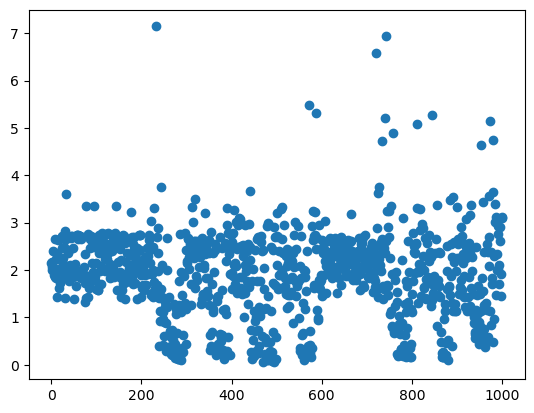

In [3]:
# Examining the dataset for randomness
plt.scatter(np.arange(len(network_df)), network_df["throughput"])
"""
This doesn't look as random as some of the previous data that I looked at, which is a good sign. It has some noticable rises and falls, and perhaps
even a semblance of periodicidy.
"""

In [4]:
df = network_df.drop("Video target", axis=1)
print(df.columns)
for col in df.columns:
    print(f'{col}: {np.unique(df[col])[:10]}')

"""
From this examination it looks like throughput, congestion, packet_loss, latency, and jitter are useful metrics for predicting future data.
We'll select this columns and graph them together and seperately to examine the initial relationships.
"""

Index(['timestamp', 'bandwidth', 'throughput', 'congestion', 'packet_loss',
       'latency', 'jitter', 'Routers', 'Planned route', 'Network measure',
       'Network target', 'Percentage video occupancy', 'Bitrate video',
       'Number videos', 'anomaly_throughput', 'anomaly_congestion',
       'anomaly_packet_loss', 'anomaly_latency', 'anomaly_jitter', 'anomaly'],
      dtype='object')
timestamp: ['2024-05-11 12:00:15' '2024-05-11 12:00:43' '2024-05-11 12:01:12'
 '2024-05-11 12:01:40' '2024-05-11 12:02:08' '2024-05-11 12:02:36'
 '2024-05-11 12:03:05' '2024-05-11 12:03:34' '2024-05-11 12:04:01'
 '2024-05-11 12:04:30']
bandwidth: [2]
throughput: [0.05 0.08 0.1  0.11 0.12 0.13 0.14 0.16 0.17 0.18]
congestion: [0.03 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13]
packet_loss: [ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5]
latency: [4.48 4.58 4.72 4.78 4.86 4.95 4.97 4.99 5.02 5.04]
jitter: [0.   0.18 0.2  0.21 0.22 0.23 0.25 0.26 0.27 0.28]
Routers: ['up xrv1,2,3' 'up xrv6']
Planned 

"\nFrom this examination it looks like throughput, congestion, packet_loss, latency, and jitter are useful metrics for predicting future data.\nWe'll select this columns and graph them together and seperately to examine the initial relationships.\n"

In [11]:
# filtering out data points marked as anomalies
for x in ["_throughput", "_congestion", "_packet_loss", "_latency", "_jitter", ""]:
    df = df.loc[df["anomaly" + x] == 0]
    
print(len(df))

747


In [12]:
filtered_df = df.filter(items=["throughput", "congestion", "packet_loss", "latency", "jitter"], axis=1)
print(len(filtered_df))

747


In [13]:
print(filtered_df.head())

   throughput  congestion  packet_loss  latency  jitter
0        2.15        0.38          0.0     6.58    0.52
1        2.16        0.12          0.0     5.36    0.34
2        2.00        0.08          0.0     6.29    0.23
3        2.07        0.07          0.0     5.91    0.51
4        2.40        0.08          0.0     5.81    0.71


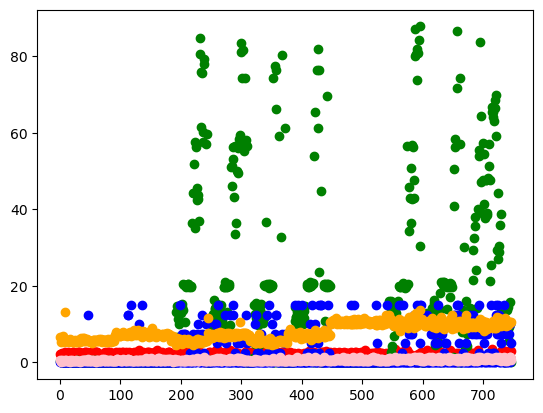

"\nFrom this we can see that there is a pretty evident correlation between the data points\nIt would be nice to run a simple linear regression model first to determine this correlation,\nusing throughput as the dependent variable.\nThere really aren't that many data points though to test on.\n"

In [14]:
plt.scatter(np.arange(len(filtered_df)), filtered_df["throughput"], color="red")
plt.scatter(np.arange(len(filtered_df)), filtered_df["congestion"], color="green")
plt.scatter(np.arange(len(filtered_df)), filtered_df["packet_loss"], color="blue")
plt.scatter(np.arange(len(filtered_df)), filtered_df["latency"], color="orange")
plt.scatter(np.arange(len(filtered_df)), filtered_df["jitter"], color="pink")
plt.show()

"""
From this we can see that there is a pretty evident correlation between the data points
It would be nice to run a simple linear regression model first to determine this correlation,
using throughput as the dependent variable.
There really aren't that many data points though to test on.
"""

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Creating testing and training sets
X = np.array(filtered_df.filter(items=["congestion", "packet_loss", "latency", "jitter"], axis=1))
y = np.array(filtered_df["throughput"])

# Training basic model
model.fit(X, y)
print(model.score(X, y))
"""
From these results we can see that there is no strong correlation between the data points at each time step
This is note exactly decisive, because it could mean that the data is both difficult to predict but also independent,
meaning that we have access to more information.

Also, the score of the linear model increased after removing the anomalies from the dataset.
This is probably good news for the quality of the data and the identification of the outliers
"""

0.2600908797519631


'\nFrom these results we can see that there is no strong correlation between the data points at each time step\nThis is note exactly decisive, because it could mean that the data is both difficult to predict but also independent,\nmeaning that we have access to more information.\n\nAlso, the score of the linear model increased after removing the anomalies from the dataset.\nThis is probably good news for the quality of the data and the identification of the outliers\n'

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

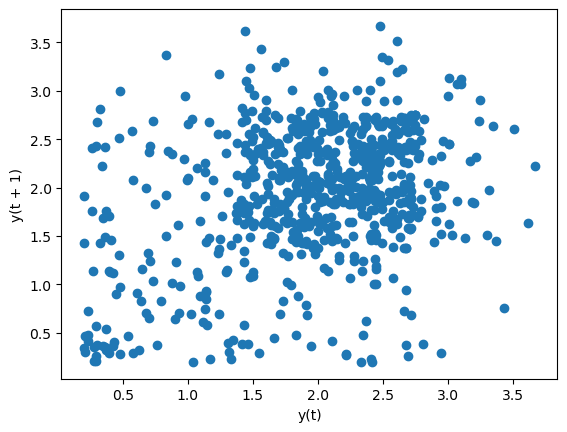

In [39]:
# Running some lag plots for various components of the dataset, primarily throughput

# The lag plot of network throughput is fairly random with a slight 
# The lag plot of congestion is pretty linear
# The lag plot of packet_loss is discrete and random
# The lag plot of latency is very linear and clumpy
# the lag plot of jitter is fairly random with a slight linear correlation

pd.plotting.lag_plot(filtered_df["throughput"], lag=1)
# pd.plotting.lag_plot(filtered_df["congestion"], lag=1)
# pd.plotting.lag_plot(filtered_df["packet_loss"], lag=1)
# pd.plotting.lag_plot(filtered_df["latency"], lag=1)
# pd.plotting.lag_plot(filtered_df["jitter"], lag=1)

In [47]:
from sklearn.model_selection import train_test_split

"""
The idea is to pass in a series of vectors of data of the form [throughput, congestion, packet_loss, latency, jitter] to successive layers of the 
neural network, with a buffer size of k. The network will have k + h layers, so k initial input layers and then at least one hidden layer to decrease
the dimensionality of the tensors to a single value of throughput. The k layers will take the data vector from each time step in in the previous k size
and use it to predict the next value of throughput. I am also going to split the data into a training and testing set by taking the last 20% of the data
for testing.
"""

# Make sure not to shuffle for time series
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)

(597,)


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, k):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.k = k

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = []
        for i in range(k):
            self.h2h.append(nn.Linear(hidden_size, hidden_size))
        self.h20 = nn.Linear(hidden_size, output_size)

    def forward(self, input_data, hidden_data, idx):
        """
        Feeds the algorithm forward using the input data and the vector of previous data
        """
        hidden_data = F.tanh(self.i2h(input_data) + self.h2h[idx](hidden_data))
        if idx == self.k - 1:
            return self.h2o(hidden_data)
        else:
            return hidden_data

    def init_hidden(self):
        """
        Returns the initial value of the previous hidden data
        """
        return torch.zeros(1, self.hidden_size)

In [60]:
# Making a RNN Object with the desired sizes
rnn = RNN(5, 5, 1, 10)
output = rnn(torch.zeros(1, 5), torch.zeros(1, 5), 0)
print(output)

tensor([[ 0.0102,  0.5460, -0.3313, -0.0551,  0.2122]],
       grad_fn=<TanhBackward0>)
